In [1]:
import scanpy as sc

[Executed on 2023-09-20 15:59:41.110352]


In [2]:
introexon_no6=sc.read_h5ad("/proj/sensoryaging/data/data/up_dated_data/CNs/analysis/introexon_no6.h5ad")

[Executed on 2023-09-20 16:00:32.936872]


[Executed on 2023-09-20 16:00:36.008704]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


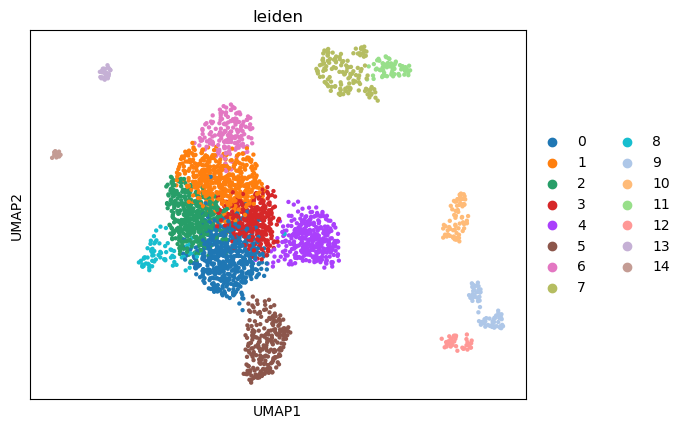

In [3]:
sc.pl.umap(introexon_no6,color='leiden')

In [4]:
introexon_no6.obs['leiden'].value_counts()

[Executed on 2023-09-20 16:01:02.443696]


leiden
0     575
1     519
2     449
3     326
4     323
5     219
6     166
7     132
8      76
9      70
10     67
11     63
12     38
13     29
14     13
Name: count, dtype: int64

[Executed on 2023-09-20 16:01:28.458922]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


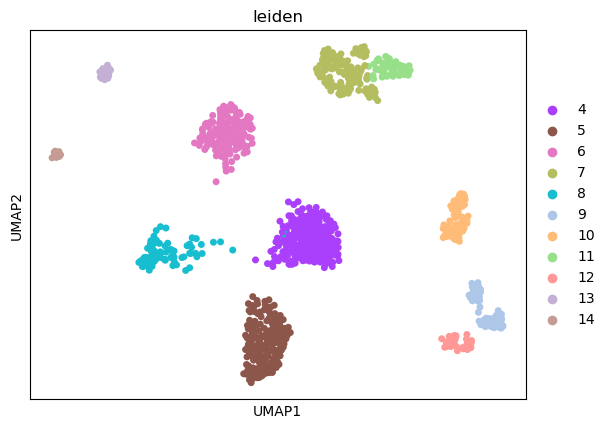

In [6]:
middleremove=sc.read_h5ad("/proj/sensoryaging/data/data/up_dated_data/CNs/analysis/middleremove.h5ad")
sc.pl.umap(middleremove,color='leiden')

[Executed on 2023-09-20 15:25:13.650701]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packag

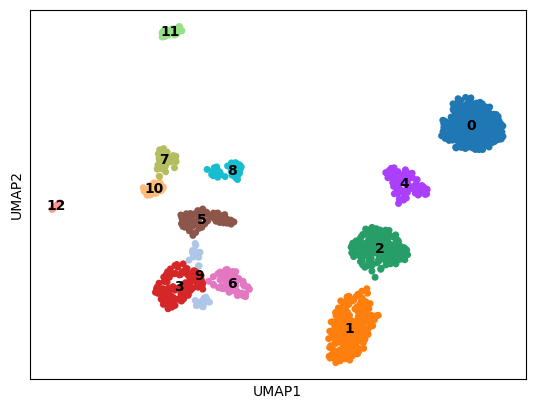

In [4]:
sc.pp.neighbors(middleremove, n_neighbors=15, n_pcs=20)
sc.tl.umap(middleremove,min_dist=0.9)
sc.tl.leiden(middleremove, resolution=0.8)
sc.pl.umap(middleremove,color=['leiden'],legend_loc='on data',title='',)

In [5]:
middleremove

[Executed on 2023-09-20 15:25:33.068785]


AnnData object with n_obs × n_vars = 1196 × 31392
    obs: 'sample_ID_Plate', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'sex', 'leiden_orig'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'sample_ID_Plate_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'umi'
    obsp: 'connectivities', 'distances'

In [6]:
del middleremove.uns['log1p']

[Executed on 2023-09-20 15:25:33.122800]


In [7]:
middleremove.X = middleremove.layers['umi'].copy()
sc.pp.normalize_total(middleremove, target_sum=None)
sc.pp.log1p(middleremove)
middleremove.layers['log1p'] = middleremove.X.copy()
sc.pp.scale(middleremove, max_value=10)
middleremove.layers['Scale'] = middleremove.X.copy()

[Executed on 2023-09-20 15:25:33.182693]


[Executed on 2023-09-20 15:25:34.413847]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


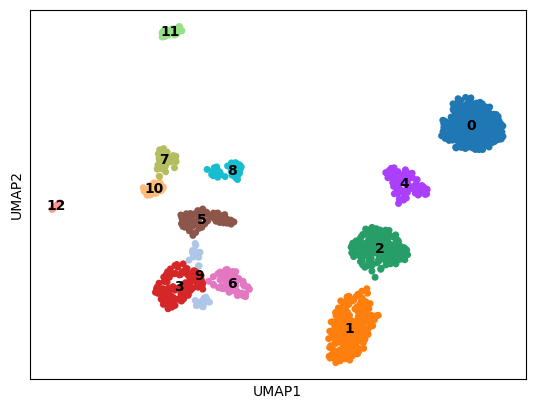

In [8]:
sc.pl.umap(middleremove,color=['leiden'],legend_loc='on data',title='',)

[Executed on 2023-09-20 15:25:34.545146]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


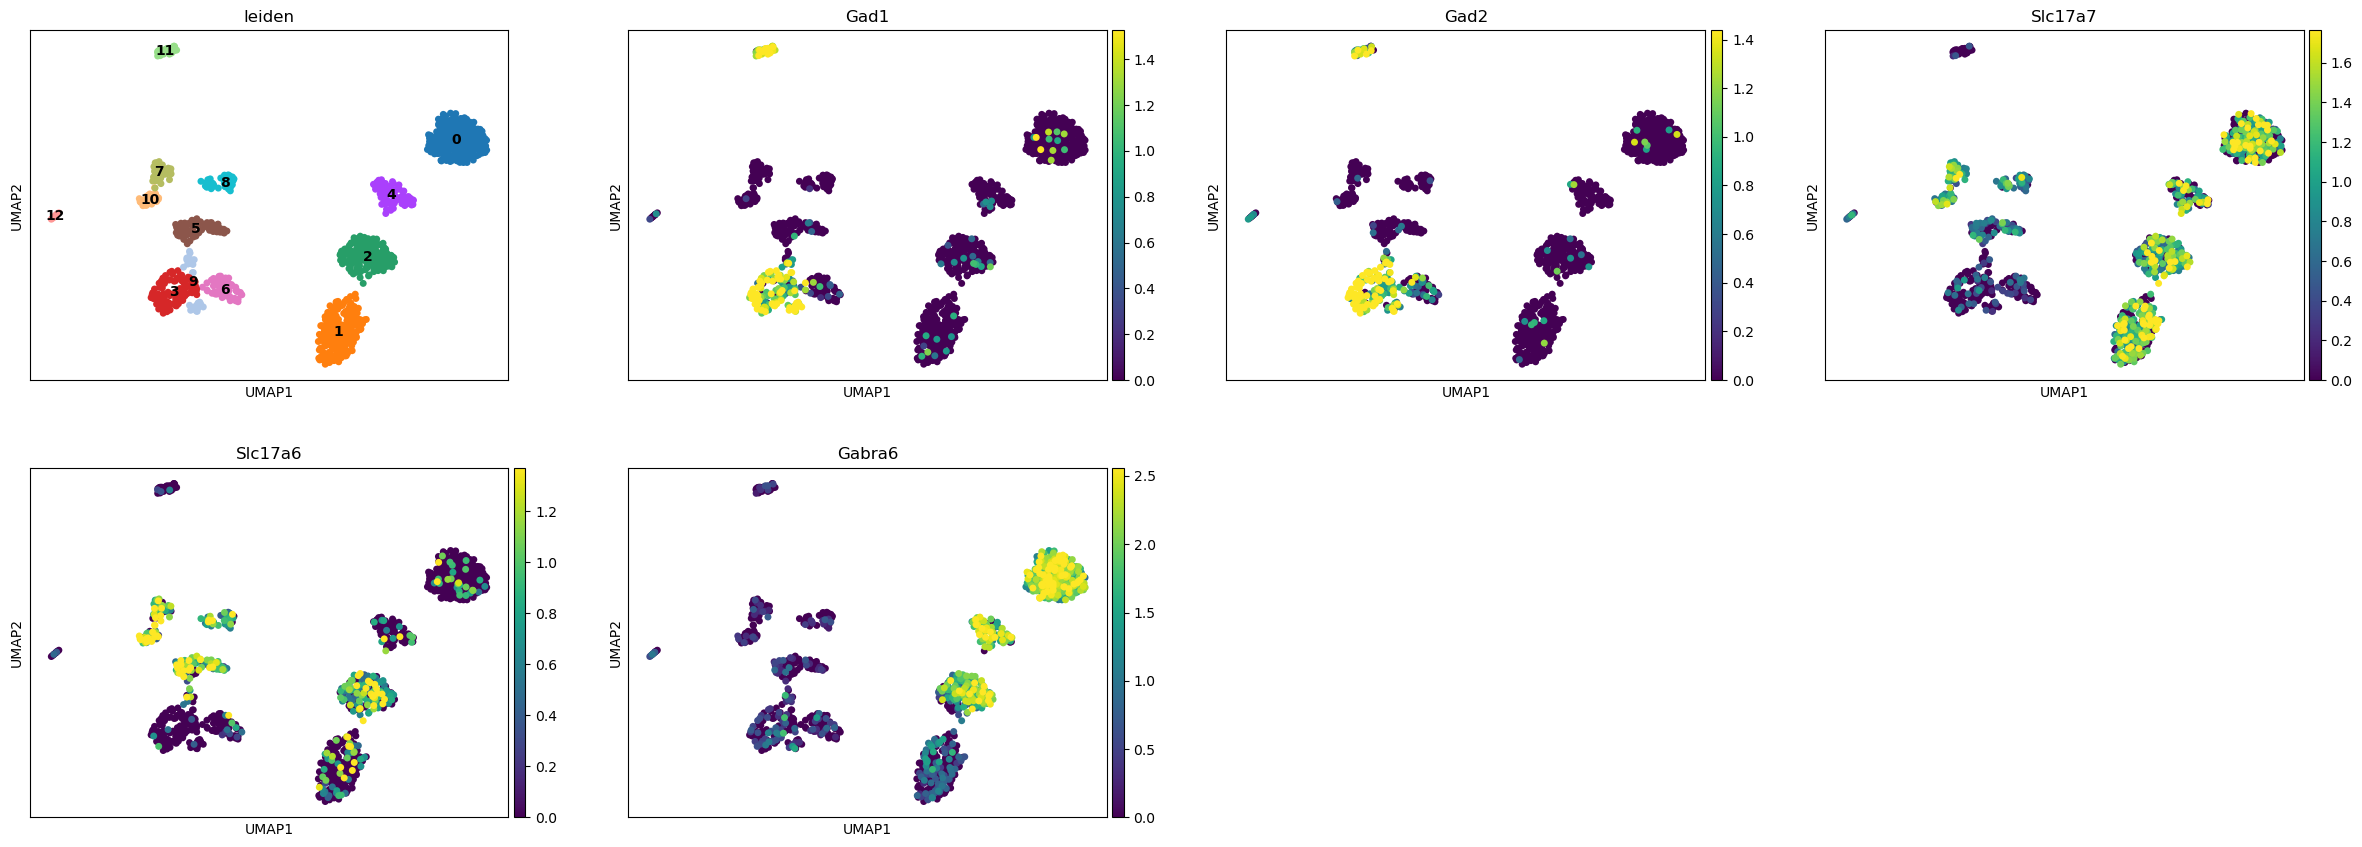

In [9]:
sc.pl.umap(middleremove,color=['leiden','Gad1','Gad2','Slc17a7','Slc17a6','Gabra6'],layer='log1p',vmax='p95',legend_loc='on data')

In [10]:
subcluster=middleremove[middleremove.obs['leiden'].isin(['11','3','9','6'])]
subcluster_exclude_4=middleremove[~middleremove.obs['leiden'].isin(['11','3','9','6'])]

[Executed on 2023-09-20 15:25:35.456238]


[Executed on 2023-09-20 15:25:35.662602]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


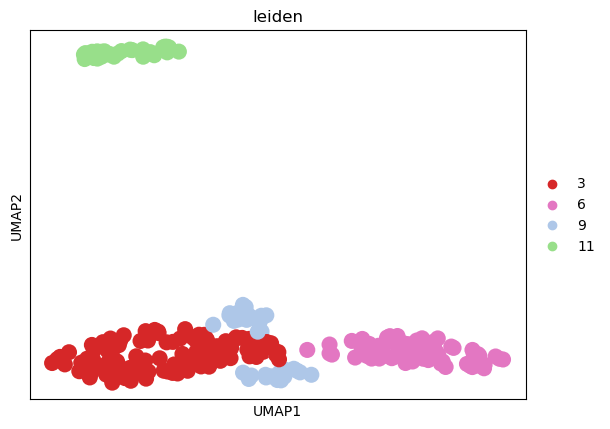

In [11]:
sc.pl.umap(subcluster,color='leiden')

[Executed on 2023-09-20 11:57:14.361881]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


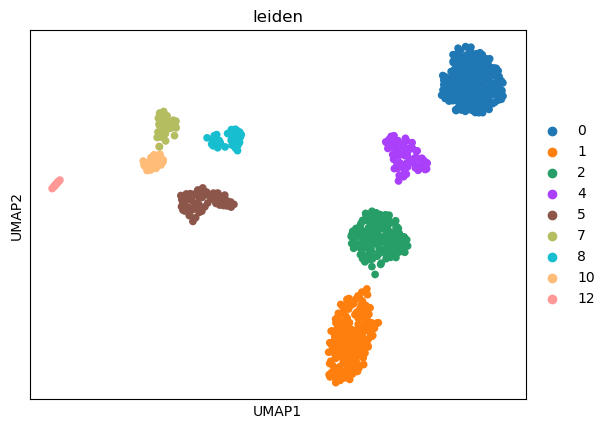

In [70]:
sc.pl.umap(subcluster_exclude_4,color='leiden')

[Executed on 2023-09-20 15:25:45.364362]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


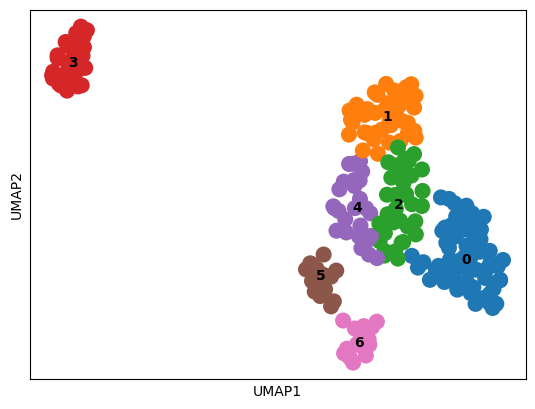

In [12]:
sc.pp.neighbors(subcluster, n_neighbors=15, n_pcs=20)
sc.tl.umap(subcluster,min_dist=0.8)
sc.tl.leiden(subcluster, resolution=0.8)
sc.pl.umap(subcluster,color=['leiden'],legend_loc='on data',title='',)

[Executed on 2023-09-20 11:59:06.331827]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


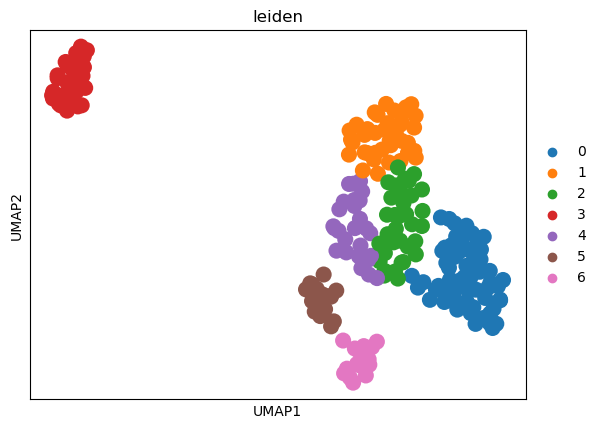

In [77]:
sc.pl.umap(subcluster,color='leiden')

[Executed on 2023-09-20 15:26:12.051902]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


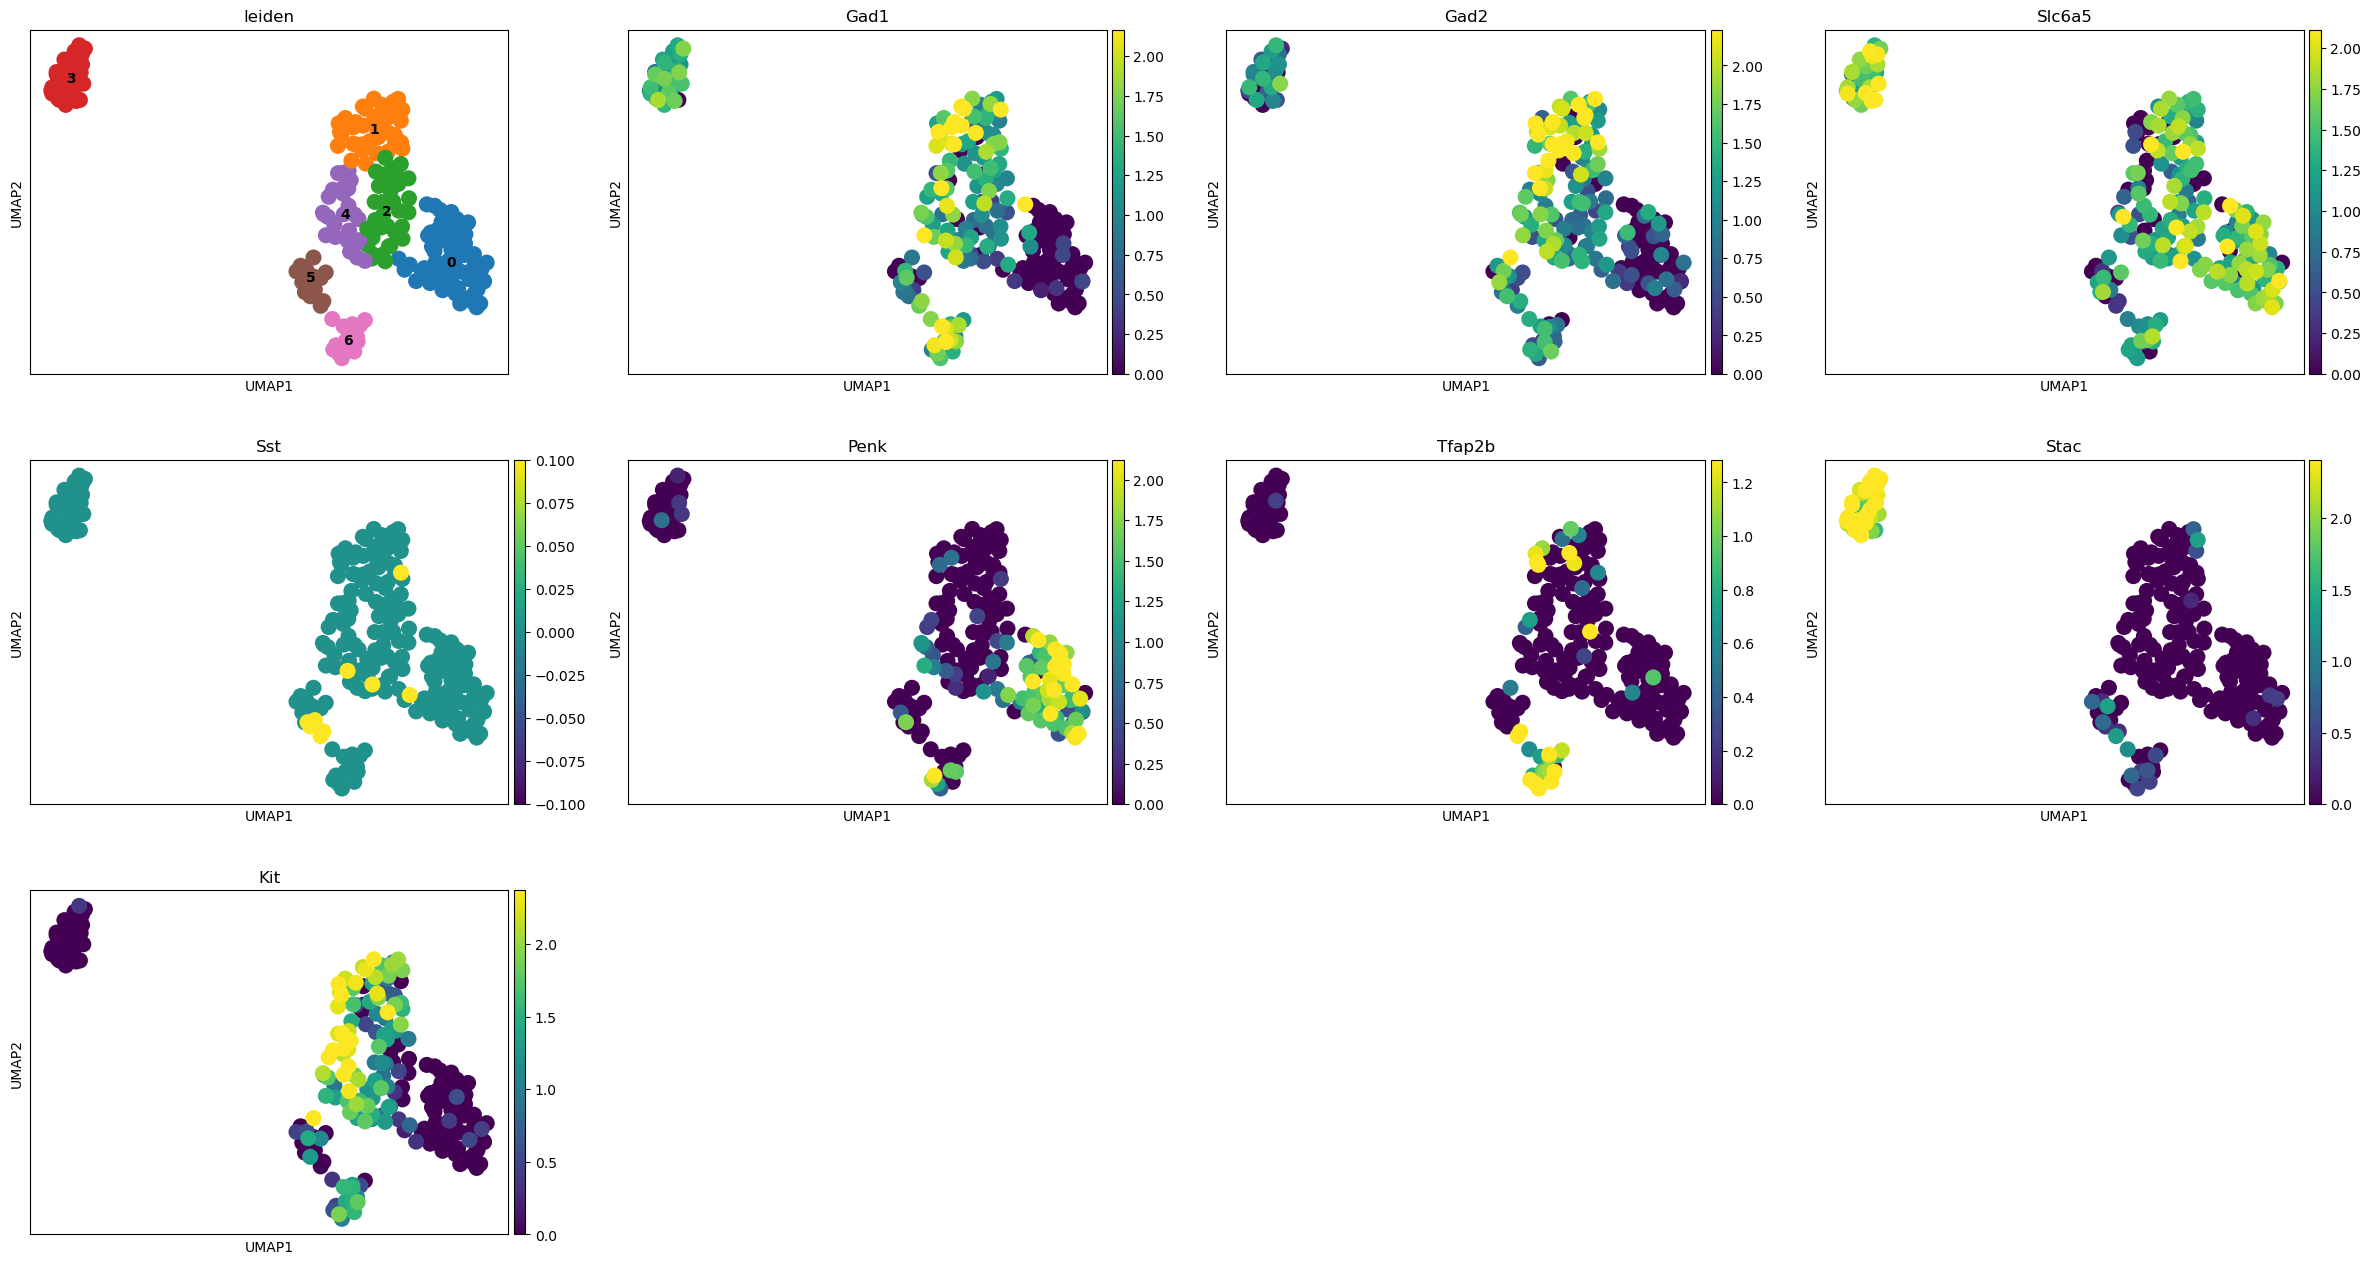

In [13]:
sc.pl.umap(subcluster,color=['leiden','Gad1','Gad2','Slc6a5','Sst','Penk','Tfap2b','Stac','Kit'],layer='log1p',vmax='p95',legend_loc='on data')

In [2]:
import scanpy as sc

[Executed on 2023-09-20 15:24:09.153182]


[Executed on 2023-09-20 15:26:29.153960]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


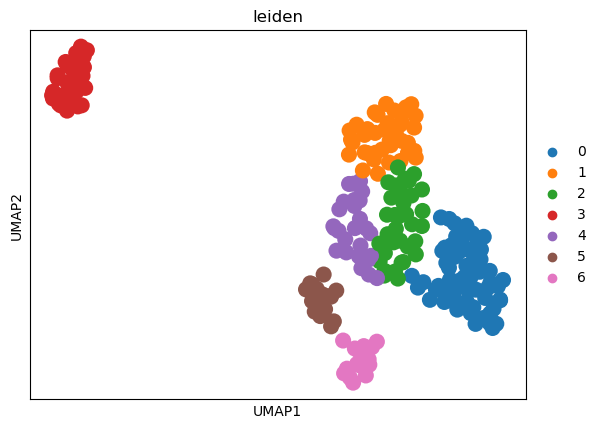

In [14]:
sc.pl.umap(subcluster,color='leiden')

[Executed on 2023-09-20 12:03:55.433552]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


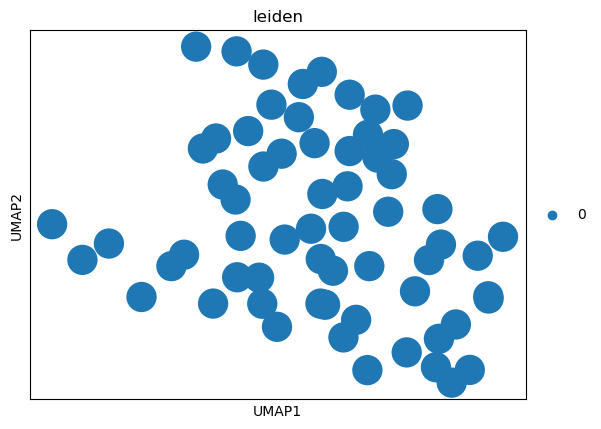

In [84]:
subcluster=subcluster[subcluster.obs['leiden']=='0']
sc.pl.umap(subcluster,color='leiden')

[Executed on 2023-09-20 12:04:19.857867]


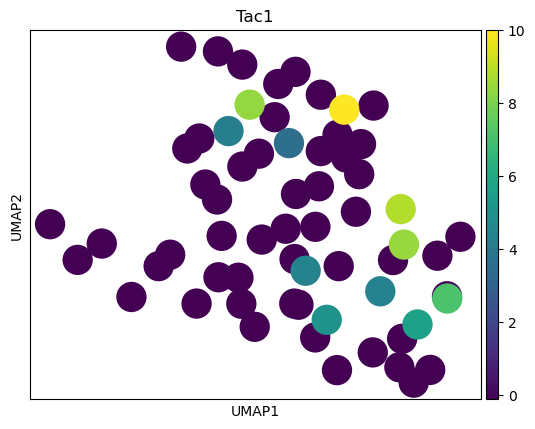

In [85]:
sc.pl.umap(subcluster,color='Tac1')

[Executed on 2023-09-20 11:57:24.388915]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


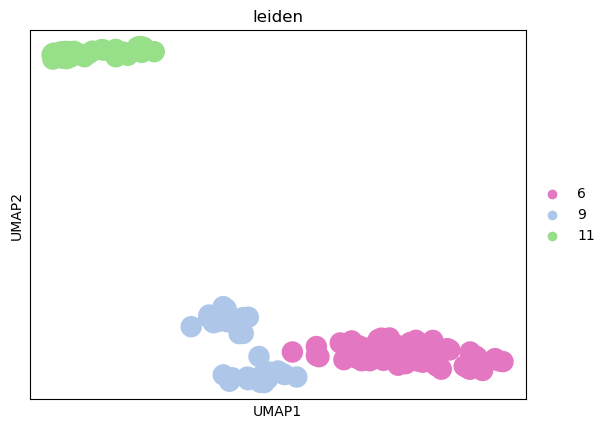

In [72]:
subcluster_1=subcluster[~subcluster.obs['leiden'].isin(['3','0'])]
sc.pl.umap(subcluster_1,color='leiden')

[Executed on 2023-09-20 11:59:13.208727]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


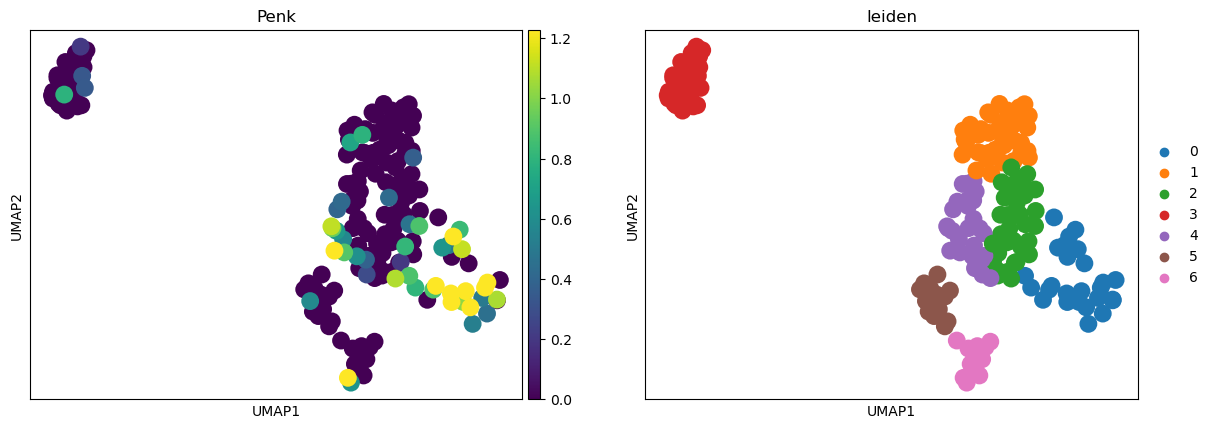

In [78]:
import scanpy as sc

# 获取相关基因的表达量
Penk_values = subcluster[:, subcluster.var_names == 'Penk'].layers['log1p'].flatten()


# 根据条件筛选细胞
mask = (Penk_values < 1.5)

# 使用mask更新AnnData对象
subcluster_1_no_penk = subcluster[mask, :]

sc.pl.umap(subcluster_1_no_penk, color=['Penk', 'leiden'], vmax='p95', layer='log1p')


[Executed on 2023-09-20 12:00:51.625184]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


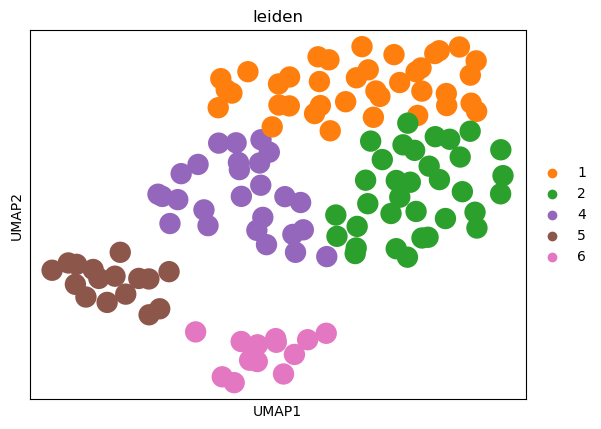

In [80]:
subcluster_1_no_penk_no_3_0=subcluster_1_no_penk[~subcluster_1_no_penk.obs['leiden'].isin(['3','0'])]
sc.pl.umap(subcluster_1_no_penk_no_3_0,color='leiden')

[Executed on 2023-09-20 12:01:06.173648]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


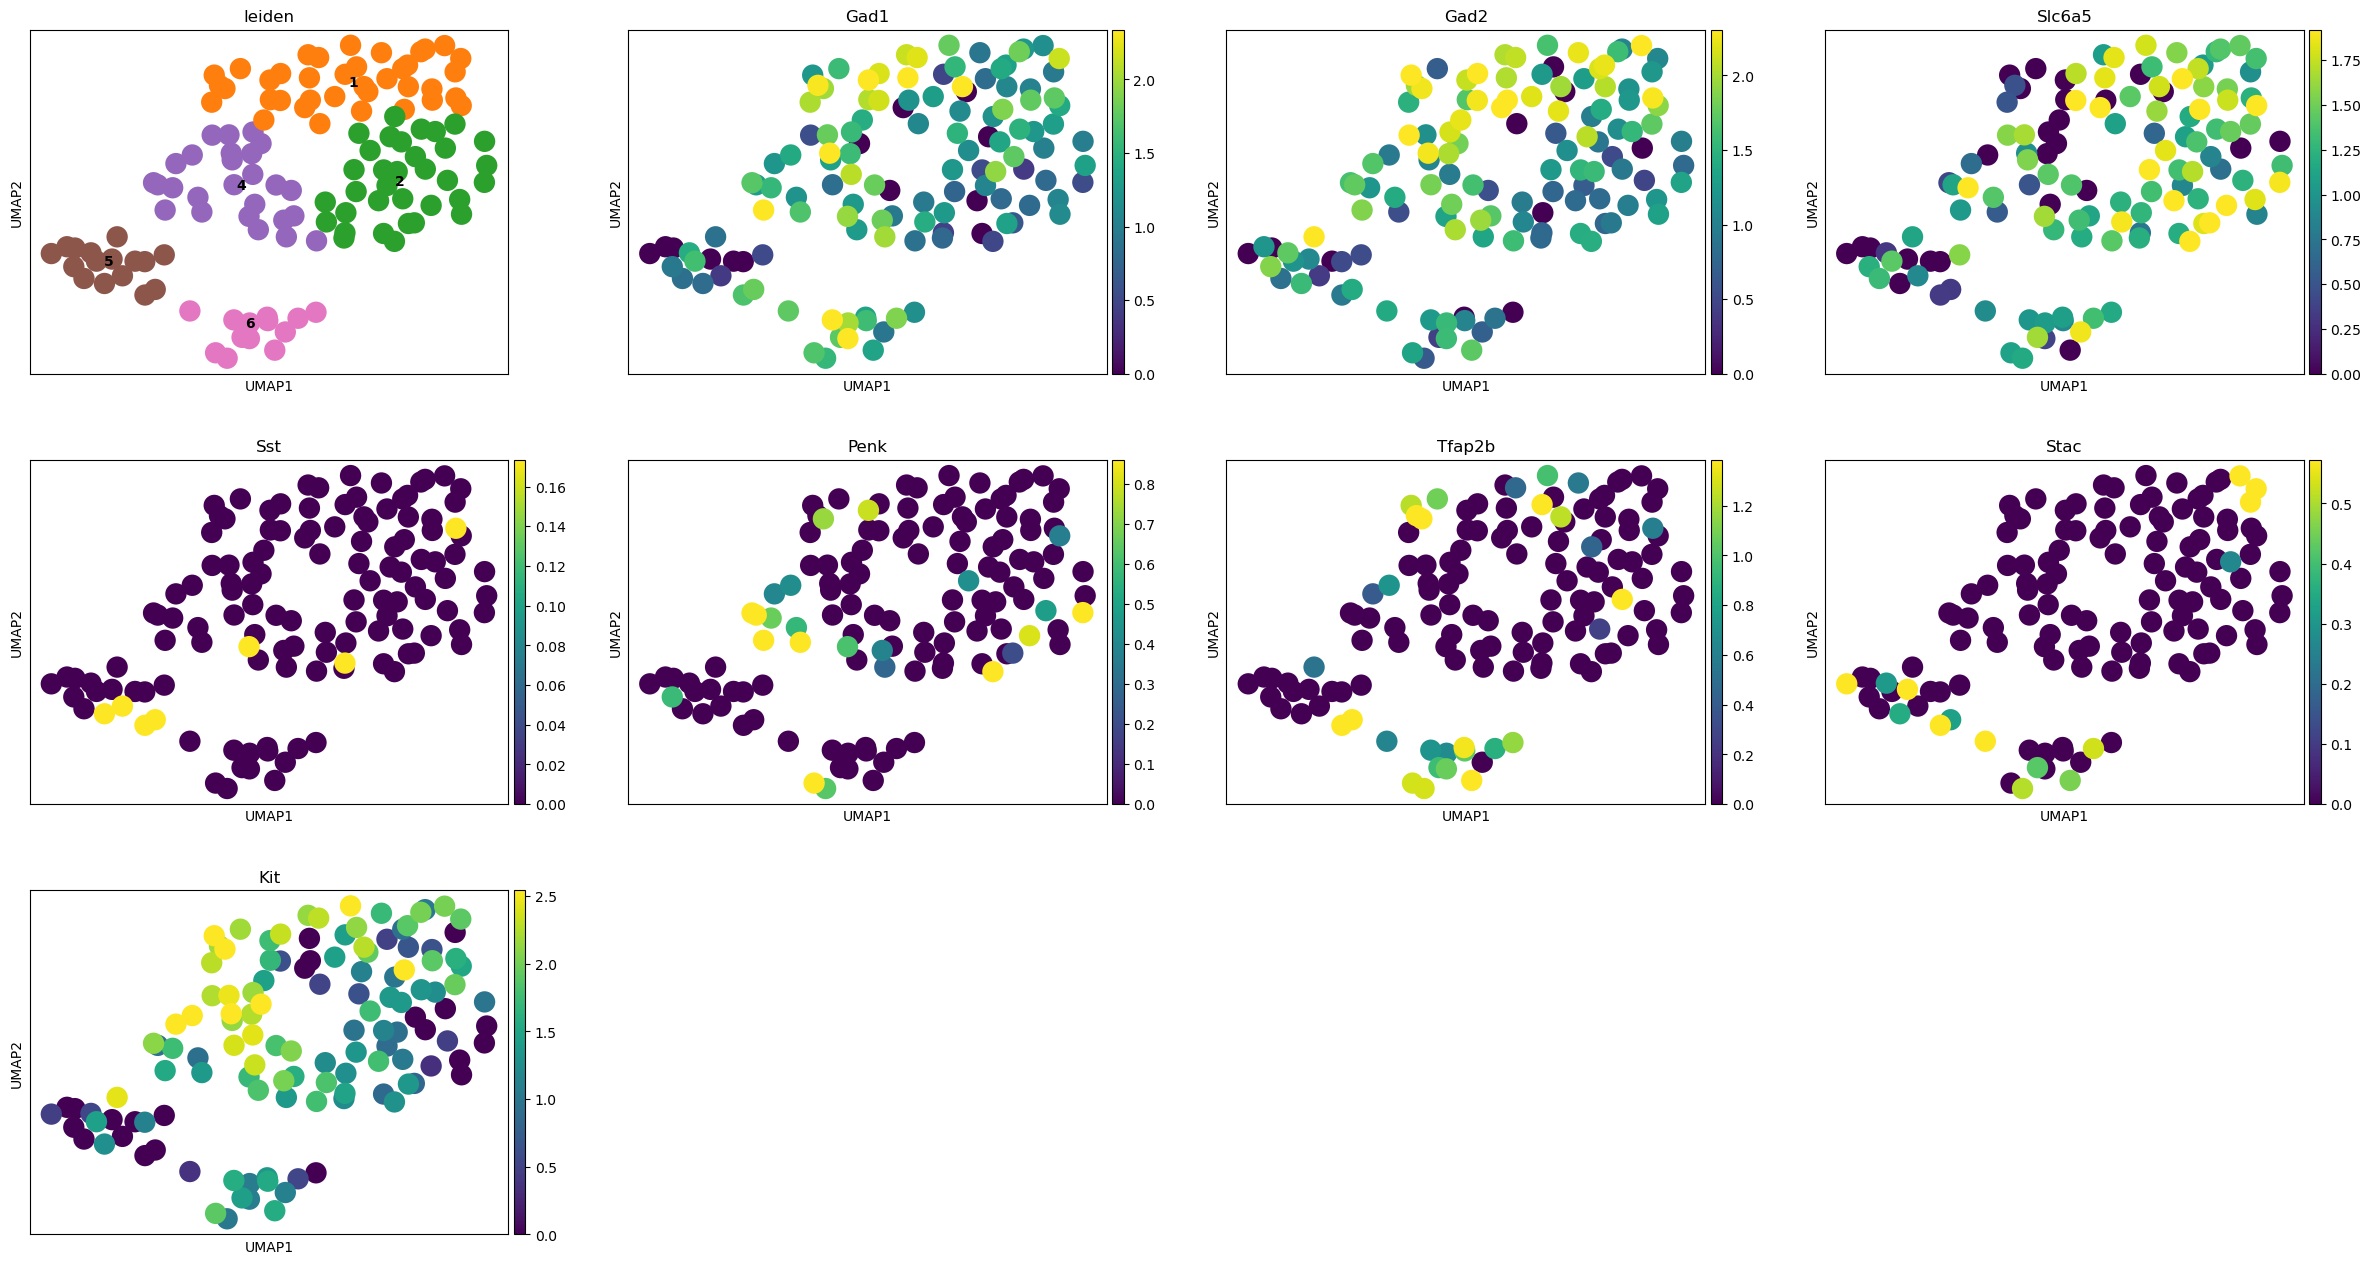

In [81]:
sc.pl.umap(subcluster_1_no_penk_no_3_0,color=['leiden','Gad1','Gad2','Slc6a5','Sst','Penk','Tfap2b','Stac','Kit'],layer='log1p',vmax='p95',legend_loc='on data')

In [49]:
subcluster_exclude_4.obs['leiden_old']=subcluster_exclude_4.obs['leiden'].copy()

[Executed on 2023-09-20 11:38:01.108934]


/scratch/ipykernel_8735/1998541563.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  subcluster_exclude_4.obs['leiden_old']=subcluster_exclude_4.obs['leiden'].copy()


[Executed on 2023-09-20 11:38:03.855958]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


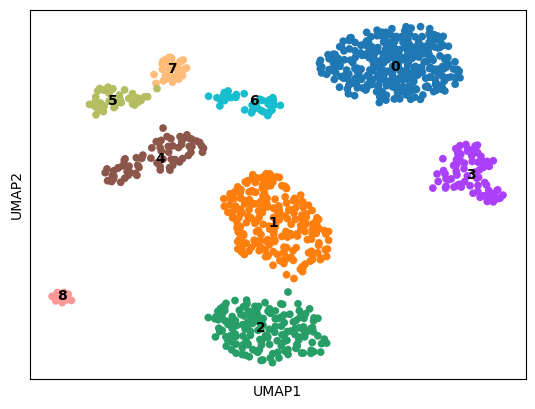

In [50]:
sc.pp.neighbors(subcluster_exclude_4, n_neighbors=15, n_pcs=20)
sc.tl.umap(subcluster_exclude_4,min_dist=0.8)
sc.tl.leiden(subcluster_exclude_4, resolution=0.8)
sc.pl.umap(subcluster_exclude_4,color=['leiden'],legend_loc='on data',title='',)

[Executed on 2023-09-20 11:38:21.000718]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


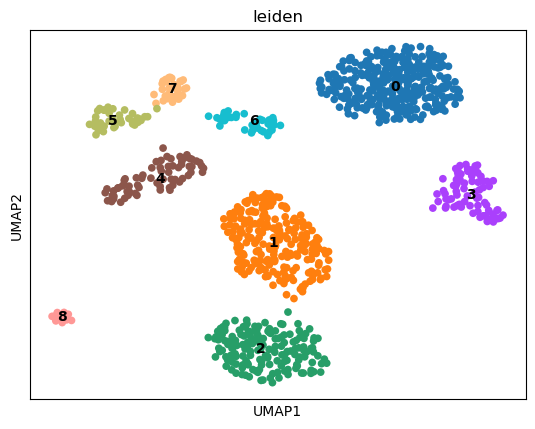

In [52]:
sc.pl.umap(subcluster_exclude_4,color=['leiden',],layer='log1p',vmax='p95',legend_loc='on data')

In [15]:
import scanpy as sc

[Executed on 2023-09-20 15:30:58.178016]


[Executed on 2023-09-20 16:01:17.722627]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


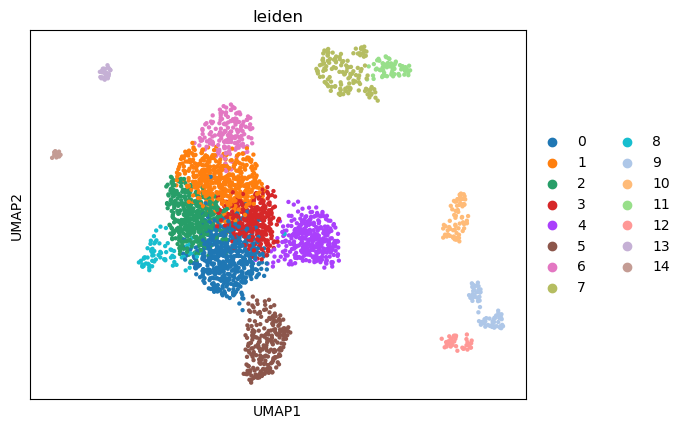

In [5]:
import scanpy as sc
introexon_no6=sc.read_h5ad("/proj/sensoryaging/data/data/up_dated_data/CNs/analysis/introexon_no6.h5ad")


sc.pl.umap(introexon_no6,color='leiden')

[Executed on 2023-09-20 16:02:35.052297]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


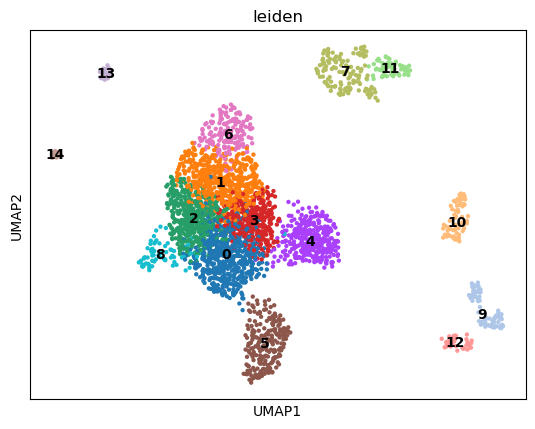

In [7]:
sc.pl.umap(introexon_no6,color='leiden',legend_loc='on data')

[Executed on 2023-09-20 16:02:39.171486]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


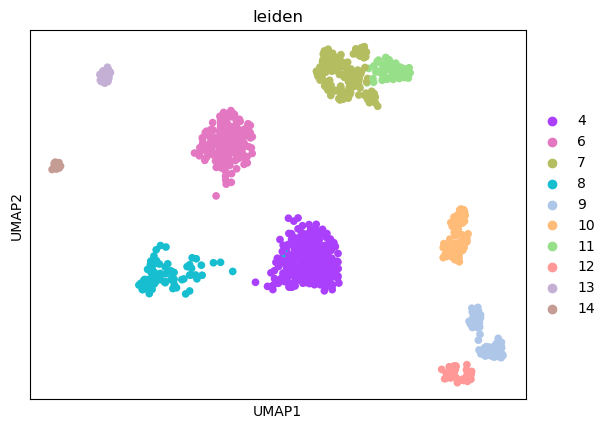

In [8]:
subcluster1=introexon_no6[~introexon_no6.obs['leiden'].isin(['0','2','1','3','5'])]

sc.pl.umap(subcluster1,color='leiden')

In [19]:
subcluster1

[Executed on 2023-09-20 15:33:16.391754]


View of AnnData object with n_obs × n_vars = 977 × 31392
    obs: 'sample_ID_Plate', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'sex'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'sample_ID_Plate_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'umi'
    obsp: 'connectivities', 'distances'

[Executed on 2023-09-20 16:02:44.599772]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packag

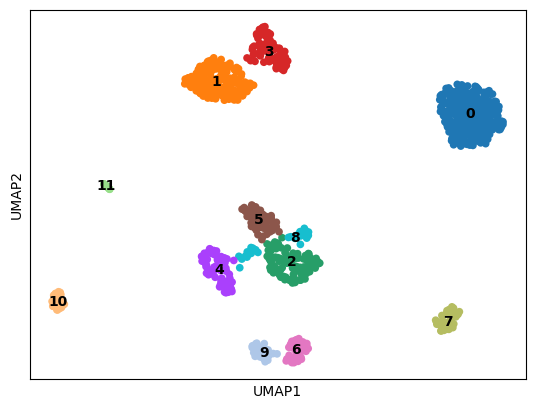

In [9]:
sc.pp.neighbors(subcluster1, n_neighbors=20, n_pcs=15)
sc.tl.umap(subcluster1,min_dist=0.7)
sc.tl.leiden(subcluster1, resolution=0.8)
sc.pl.umap(subcluster1,color=['leiden'],legend_loc='on data',title='',)

[Executed on 2023-09-20 15:35:13.252974]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


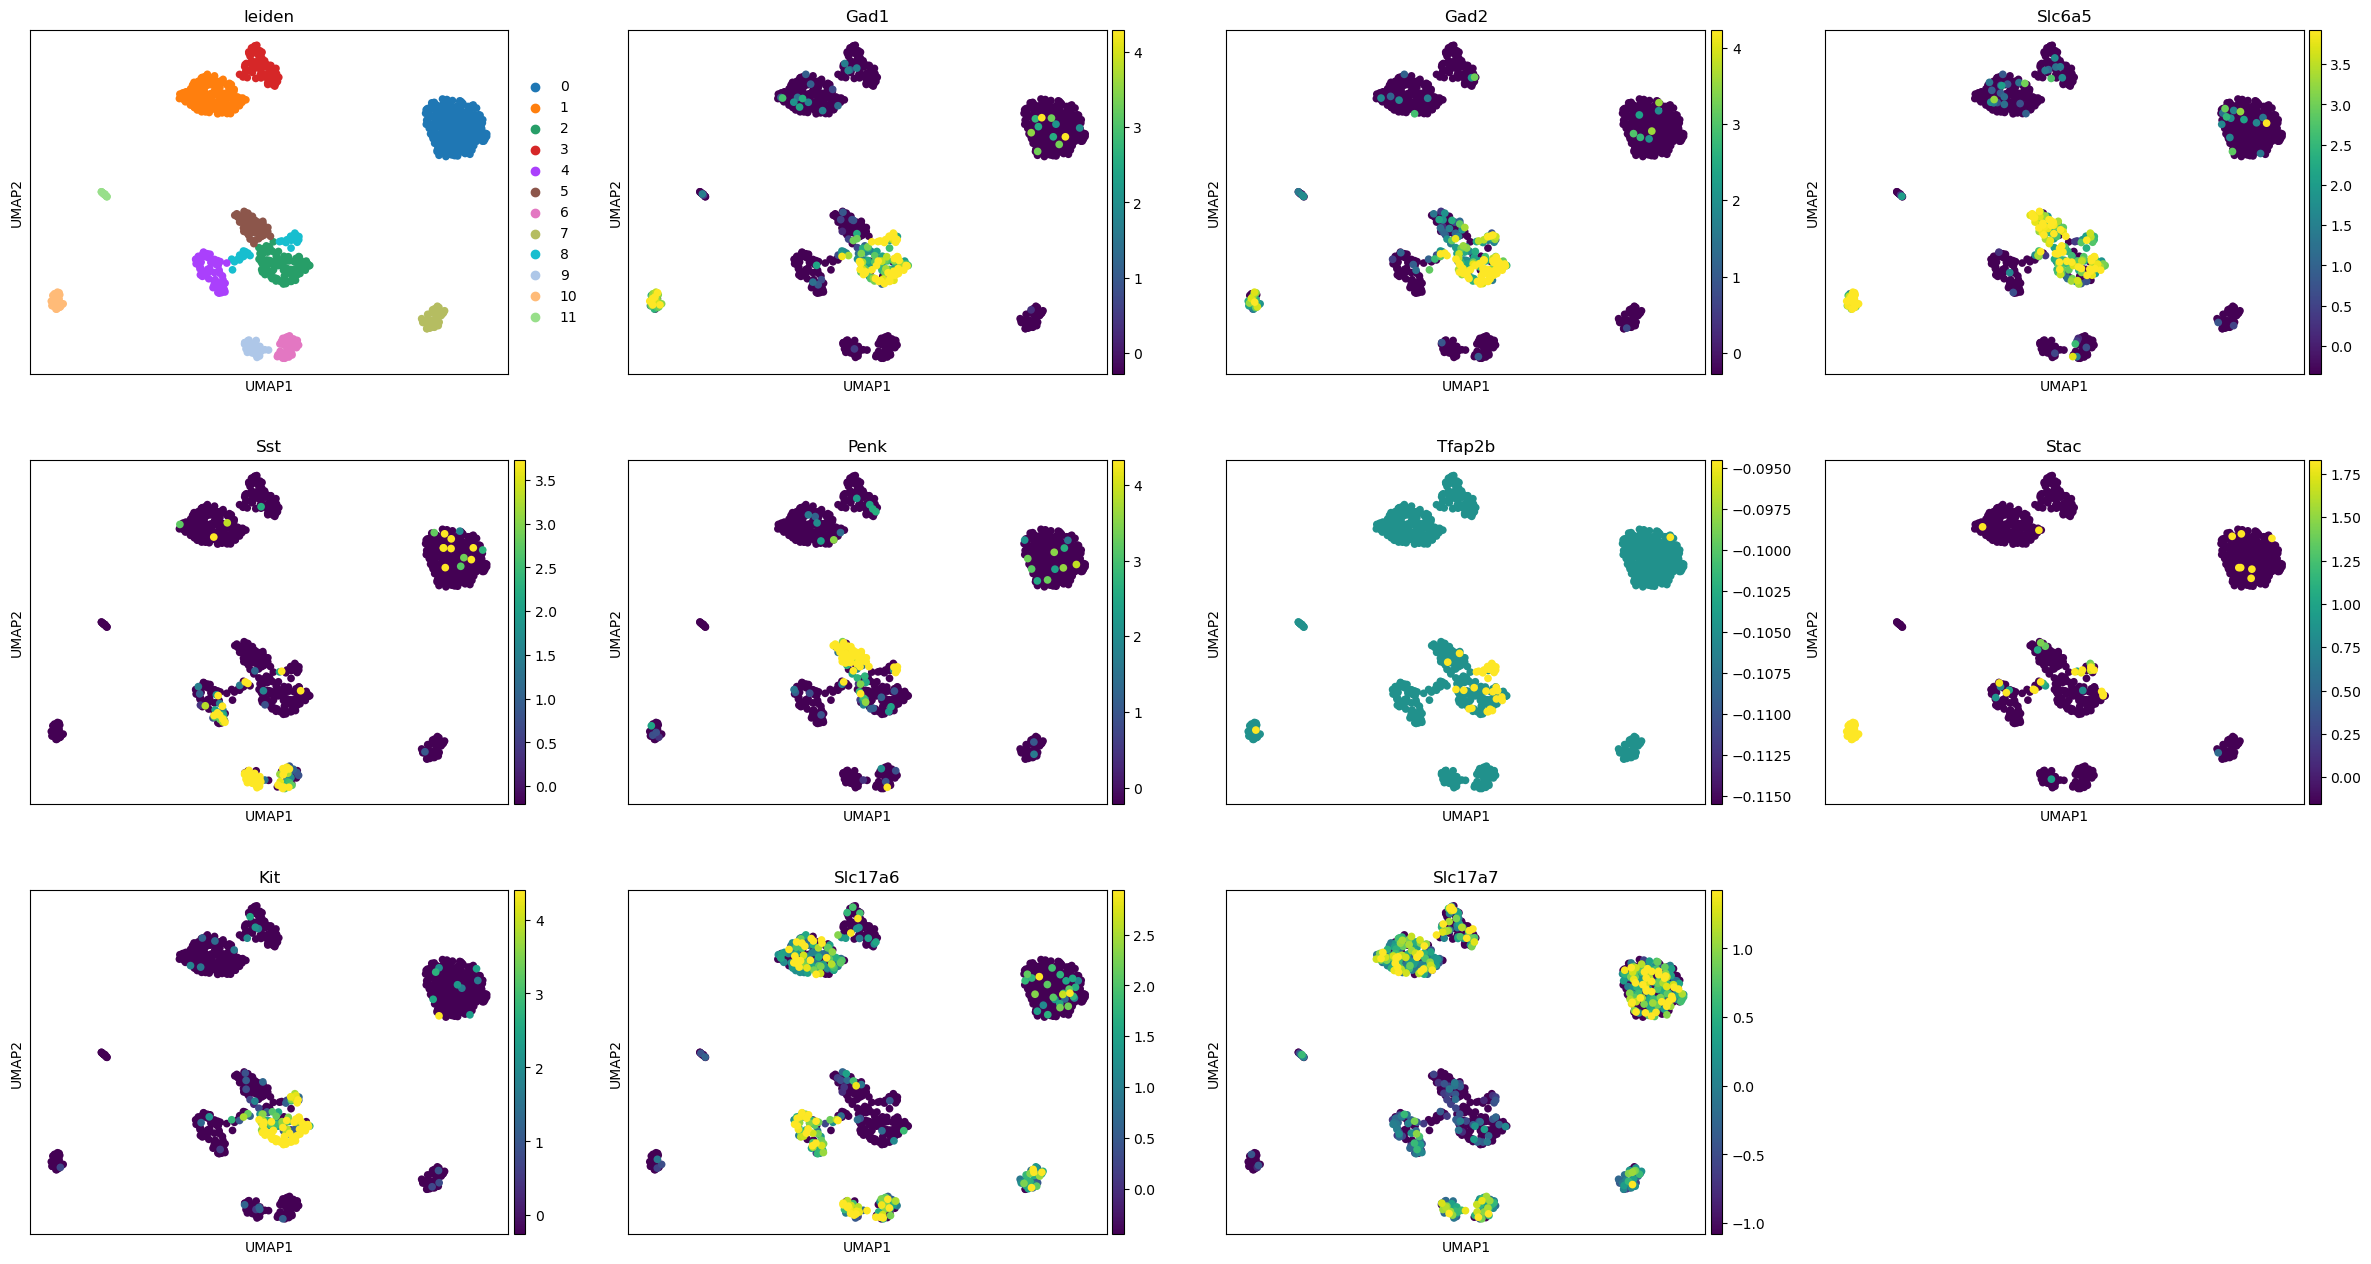

In [22]:
sc.pl.umap(subcluster1,color=['leiden','Gad1','Gad2','Slc6a5','Sst','Penk','Tfap2b','Stac','Kit','Slc17a6','Slc17a7'],vmax='p95')

/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


[Executed on 2023-09-20 16:03:02.783591]


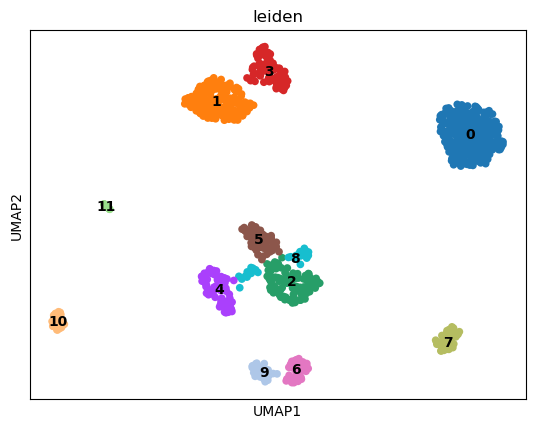

In [10]:
sc.pl.umap(subcluster1,color=['leiden'],legend_loc='on data')

In [11]:
Excitory=subcluster1[~subcluster1.obs['leiden'].isin(['2','5','8','10'])]
Inhibitory=subcluster1[subcluster1.obs['leiden'].isin(['2','5','8','10'])]


[Executed on 2023-09-20 16:03:02.917517]


[Executed on 2023-09-20 16:03:03.084825]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


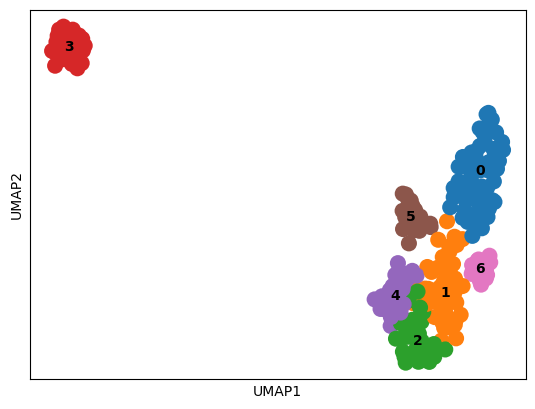

In [12]:
sc.pp.neighbors(Inhibitory, n_neighbors=20, n_pcs=15)
sc.tl.umap(Inhibitory,min_dist=0.7)
sc.tl.leiden(Inhibitory, resolution=0.8)
sc.pl.umap(Inhibitory,color=['leiden'],legend_loc='on data',title='',)

[Executed on 2023-09-20 16:03:05.226940]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


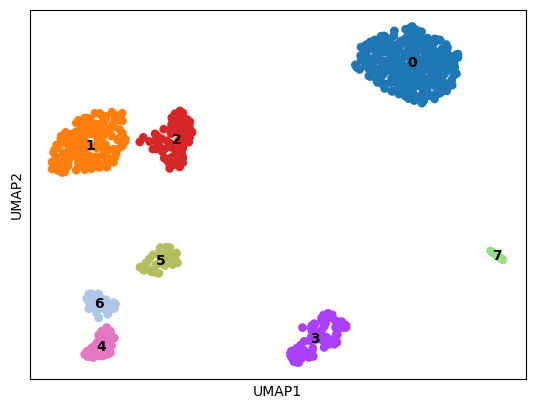

In [13]:
sc.pp.neighbors(Excitory, n_neighbors=20, n_pcs=15)
sc.tl.umap(Excitory,min_dist=0.7)
sc.tl.leiden(Excitory, resolution=0.8)
sc.pl.umap(Excitory,color=['leiden'],legend_loc='on data',title='',)

[Executed on 2023-09-20 16:04:09.459630]


KeyError: 'Pgk'

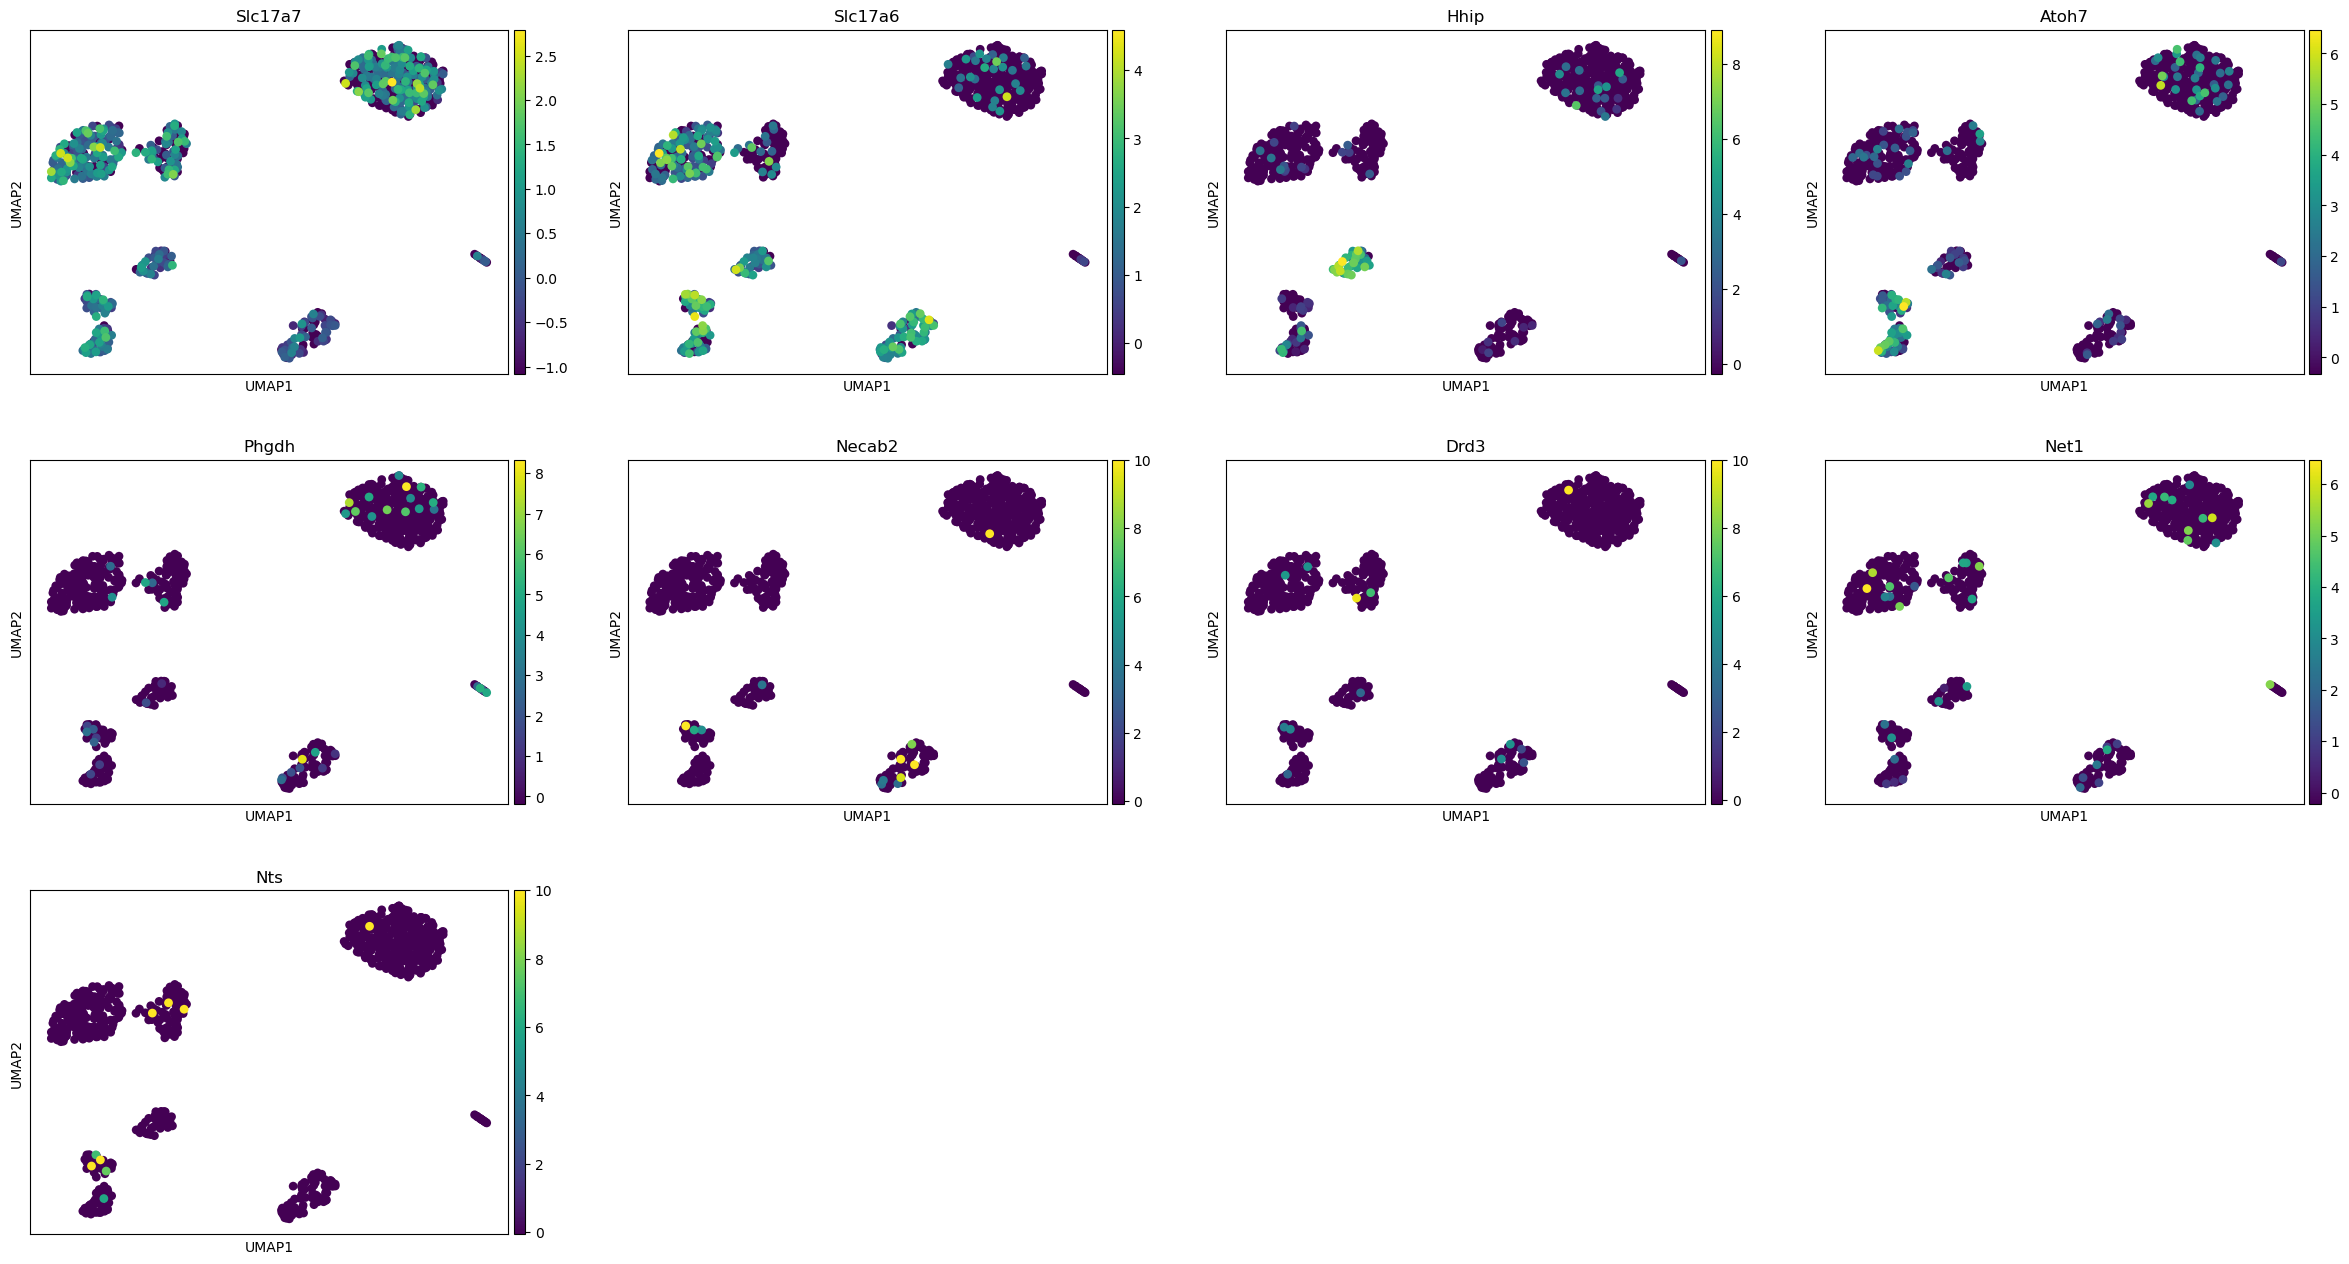

In [16]:
sc.pl.umap(Excitory,color=['Slc17a7','Slc17a6','Hhip','Atoh7','Phgdh','Necab2','Drd3','Net1','Nts','Pgk'])